<H1 align="center">  Google Data Analytics Certificate </H1>

---

# Case Study 3: Follow Your Own Path

In this scenario I have been given the opportunity to choose my own question that is of interest to me. I've decided to work with data concerning the state of democracy worldwide. Thankfully the [International Institute for Democracy and Electoral Assistance](https://www.idea.int/) (International IDEA) publishes the annual Global State of Democracy (GSoD). I'll be working with this report and it's accompanying dataset.

## The task

Analyze the GSoD 2021 data to gain insight into how different countries and states are excercising democracy over time. These insights will help in diagnosing and prognosing the state of democracy in the world.

## About International IDEA and the GSoD

According to it's website the International IDEA defines itself as "an intergovernmental organization that supports sustainable democracy worldwide". Their self-described tasks are to develop policy-friendly research and analysis related to elections, parliaments, constitutions, digitalization, climate change, inclusion and political represetnation under the umbrella of the UN Sustainable Development Goals.

They assess the performance of democracies through the Global State of Democracy Indices and the Democracy Tracker. International IDEA launched the Global State of Democracy (GSoD) Initiative in 2016. This Initiative provides evidence-based, balanced analysis and data on the state and quality of democracy for 173 countries across the world. It aims to contribute to the public debate on democracy and inform policy interventions to strengthen democracy.

# The report

The insights will be presented following the data analysis process steps:

* 🤔**Ask**: Identify the problem to be solved and how our insights can drive policy decisions.
* 💻**Prepare**: Gather the relevant data, organize it and store it. Verify data integrity and credibility.
* ⚙️**Process**: Choose tools to handle the data and identify its advantages. Clean the data and ensure it is ready for analysis. Document the cleaning process and save cleaned data.
* 🧑🏻‍💻**Analyze**: Organize and format the data to answer questions. Perform calculations and identify trends and relationships within the data.
* 📊**Share**: Create visualizations to share most relevant findings. Relate findings to original questions.
* 💥**Act**: Present final conclusions and suggested approach to deal with findings and next steps.

---

# 🤔 **Ask**:

## The task at hand

Analyze the dataset from the GSoD 2021 to detect trends and correlations between its indicators in order to make conclusions and actionable recomendations for policy that would protect and enforce democracy worldwide.

**How can current trends in global democracy guide international and government policy for the development of democracy?**

## The stakeholders

* **International IDEA**
* **National governments**
* **The general public**

---

# 💻 **Prepare**:

## Getting the data

I'll use data from **[The Global State of Democracy Indices](https://www.kaggle.com/datasets/aliaamiri/the-global-state-of-democracy-indices)** (CC0: Public Domain, dataset made available on Kaggle through [Ali A. Amir](https://www.kaggle.com/aliaamiri)). This Kaggle data set contains 203 variables and covers different aspects of democracy in different countries from 1975 to 2020. Each country is scored between 0 to 1 based on its performance.


Inside the `GSoD` folder, we can find a `csv` file named `GSoDI_v5.1` with all the data included. We can also find the **GSoD Indices Codebook** that will give us the names and information on the diffrent variables included in the `csv` file.

To read the data I will upload it to **BigQuery** and perform the first steps of preperation and processing there. After uploading, the table info page states that there are 203 variables and 8533 records.

For brevity's sake I've decided to limit the number of variables down to a concise 26. These variables represent the identifying variables and the most high-level interpretations of the *five attributes of democracy* included in the GSoD. These are:

- Identifying variables
	- ID Country Year (ID_country_year)
	- ID Country Name (ID_country_name)
	- ID Country Code (ID_country_code)
	- ID Year (ID_year)
	- ID Region (ID_region)
	- ID Subregion (ID_subregion)


- Representative Government (C_A1)
	- Clean Elections (C_SD11)
	- Inclusive Suffrage (C_SD12)
	- Free Political Parties (C_SD13)
	- Elected Government (C_SD14)
    
    
- Fundamental Rights (C_A2)
	- Access to justice (C_SD21)
	- Civil liberties (C_SD22)
	- Social rights and equality (C_SD23)


- Checks on Government (C_A3)
	- Effective parliament (C_SD31)
	- Judicial independence (C_SD32)
	- Media integrity (C_SD33)
    
- Impartial Administration (C_A4)
	- Absence of corruption (C_SD41)
	- Predictable enforcement (C_SD42)
    
- Participatory Engagement
	- Civil society participation (C_SD51)
	- Electoral participation (C_SD52)
	- Direct Democracy (C_SD53)
	- Local Democracy (C_SD54)

>CREATE TABLE GSoD.GSoDtable AS (
  SELECT ID_country_year, ID_country_name, ID_country_code, ID_year,   ID_region, ID_subregion,  
C_A1, C_SD11, C_SD12, C_SD13, C_SD14,  
C_A2, C_SD21, C_SD22, C_SD23,  
C_A3, C_SD31, C_SD32, C_SD33,  
C_A4, C_SD41, C_SD42,   
C_SD51, C_SD52, C_SD53, C_SD54  
FROM zeta-structure-378101.GSoD.GSoDI)  

---

# ⚙️ **Process**

## Data cleaning and manipulation

After creating the initial table I'll proceed to view it's first rows to familiarize myself with the type of data I can expect.

> SELECT *  
> FROM `zeta-structure-378101.GSoD.GSoDtable`  
> LIMIT 10  

I've noticed that the `ID_country_year` variable is the unique identifier for each row. All other identifying variables have repeat values useful for grouping and categorizing data later on.

I'll proceed to count the number of records in the `ID_country_year` variable and also check for any nulls or repeated values.

>SELECT COUNT (ID_country_year) AS total_ids,  
COUNTIF (ID_country_year IS NULL) AS null_ids,  
COUNT (DISTINCT ID_country_year) AS unique_ids  
FROM `zeta-structure-378101.GSoD.GSoDtable`  

>--total_ids = 8533  
--null_ids = 0  
--unique_ids = 8533  

The query shows that all `ID_country_year` entries are unique and non-null.

While I was revising the first rows of the table I also noticed that the first values of the `ID_country_name` variable were OAS, a supranational body. This is information that would complicate analysis further on since this same variable also has individual country names for values. I decided that it'd be best to remove any supranational bodies or non-individual country names from this value.

I noticed that the records that had the OAS value in the `ID_country_name` variable also had NA values in the `ID_region` and `ID_subregion` variables. Because of this I'll query for distinct values in the `ID_country_name` variable that also have NA values in the previously mentioned variables.

>SELECT DISTINCT ID_country_name,  
FROM `zeta-structure-378101.GSoD.GSoDtable`  
WHERE ID_region = 'NA' OR ID_subregion ='NA'  

>--ID_country_name =  
OAS, OECD, ASEAN, World, Africa, Europe, Middle East, Asia/Pacific,  
African Union, North America, European Union, Latin America/Caribbean  

This query gave the names of supranational bodies and regional categorizations. I then proceed to count the number of distinct non-individual countries and the number of records with these values.

>SELECT COUNT(DISTINCT ID_country_name) AS count_supranational, COUNT(*) AS total_supranational_records  
FROM `zeta-structure-378101.GSoD.GSoDtable`   
WHERE ID_region = 'NA' OR ID_subregion ='NA'  

>--count_supranational = 12  
--total_supranational_records = 552  

With these steps realized I can now proceed to clean the data for the final table for analysis.

>CREATE TABLE GSoD.GSoDfinal AS (  
  SELECT *  
  FROM `zeta-structure-378101.GSoD.GSoDtable`   
  WHERE ID_region <> 'NA' OR ID_subregion <>'NA')  


And finally I'll verify the creation of this new table by counting the number of records it posseses. It should be 552 records less than the 8533 of the previous table.

>SELECT COUNT(*)  
FROM `zeta-structure-378101.GSoD.GSoDfinal`  

>--f0_ = 8257  

---

# 🧑🏻‍💻 **Analyze**

## Import and additional cleaning

After exporting the data from BigQuery into a CSV file I then proceed to import into RStudio. Before doing so I'll also load tidyverse.

In [11]:
library(tidyverse)

gsod <- read_csv("https://raw.githubusercontent.com/arboles95/gsod/main/gsod_final.csv")

Rows: 8257 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ID_country_name
dbl (25): ID_country_year, ID_country_code, ID_year, ID_region, ID_subregion...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


After looking into the main dataframe I notice that the ID_country_name variable includes records for subregions, which for our purposes is redundant since we already have a ID_subregion variable that tells us which countries belong into which subregions.

In [13]:
subregion_names <- c('Central Africa', 'East Africa', 'North Africa', 'Southern Africa',
                     'West Africa', 'Central Asia', 'East Asia', 'Oceania',
                     'South Asia', 'South-East Asia', 'East-Central Europe',
                    'Eastern Europe', 'North/Western Europe', 'Southern Europe',
                     'Caribbean', 'Central America', 'South America')

gsod <- gsod %>%
  filter(!(ID_country_name %in% subregion_names))


## Approach

For the first four variables or attributes I will be running a linear progression for each one where the higher level attribute is the dependent variable and the lower level subattributes are the independent variables.

I know that the attributes are composed partially by the subattributes but also by other variables in the equation that are not technically specified by the GSoD indices codebook.

Of course all aspects of democracy are important, this excercise is just
to get additional insights into what trends can be found among the data in the lower level subattributes that's most influential into the higher level attributes.

For the final attribute, since it doesn't possess a single overarching indice but instead 4 seperate subattribute indices, I've decided to compare their scores for the countries in the South America subregion in 2020.

Before starting I'll install and load the pacakages needed to run the assumption tests


In [17]:
install.packages("performance")
library(performance)

install.packages("see")
library(see)

install.packages("patchwork")
library(patchwork)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Representative Government (C_A1)

The Representative Government attribute is defined as that which "emphasizes contested and inclusive popular elections for legislative and executive offices."

It has subattributes Clean elections (C_SD11), Inclusive suffrage (C_SD12), Free political parties (C_SD13) and Elected government (C_SD14).


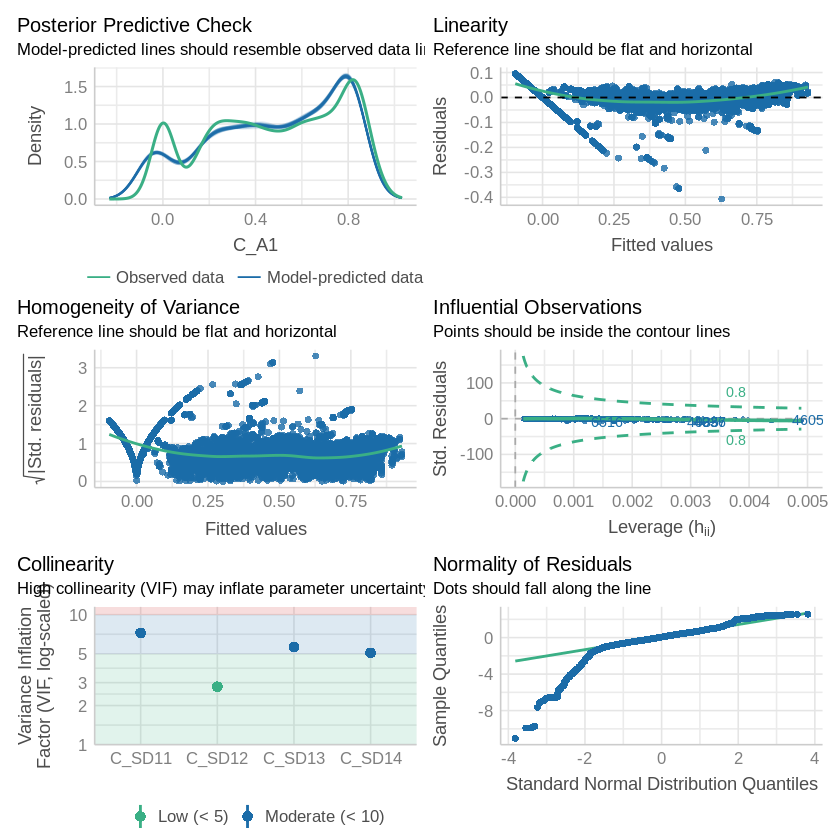

In [18]:
#I'll write the regression and save it into an object
lm_C_A1 <- lm(C_A1 ~ C_SD11 + C_SD12 + C_SD13 + C_SD14, data = gsod)

#And now I run the assumption tests.
check_model(lm_C_A1)


In [19]:
#All 6 assumption tests pass to the highest degrees (among these are tests of linearity, collinearity, homogeneity of variance and normality of residuals)
#And now onto the linear regression model (ordinary least squares) itself.
summary(lm_C_A1)



Call:
lm(formula = C_A1 ~ C_SD11 + C_SD12 + C_SD13 + C_SD14, data = gsod)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.40664 -0.01499  0.00224  0.01951  0.09551 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.100106   0.001360  -73.59   <2e-16 ***
C_SD11       0.482741   0.003887  124.19   <2e-16 ***
C_SD12       0.073579   0.002338   31.48   <2e-16 ***
C_SD13       0.316261   0.004335   72.95   <2e-16 ***
C_SD14       0.181836   0.002897   62.77   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03714 on 7465 degrees of freedom
  (21 observations deleted due to missingness)
Multiple R-squared:  0.9832,	Adjusted R-squared:  0.9832 
F-statistic: 1.094e+05 on 4 and 7465 DF,  p-value: < 2.2e-16


In [20]:
#The most influential subattribute in the regression was Clean elections (C_SD11)

#How about we see the yearly index of Clean elections by region?

#I'll define a named vector mapping region IDs to region names
region_names <- c("Africa", "Latin America/Caribbean", "Europe","Asia/Pacific",
                  "Middle East", "North America")
region_mapping <- setNames(region_names, 1:6)

#And then replace integers with region names
gsod <- gsod %>%
  mutate(ID_region = recode(ID_region, !!!region_mapping))

yearly_C_SD11 <- gsod %>%
  filter(!is.na(C_SD11)) %>%
  group_by(ID_year, ID_region) %>%
  summarise(mean(C_SD11)) %>%
  arrange(ID_year)


`summarise()` has grouped output by 'ID_year'. You can override using the
`.groups` argument.


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


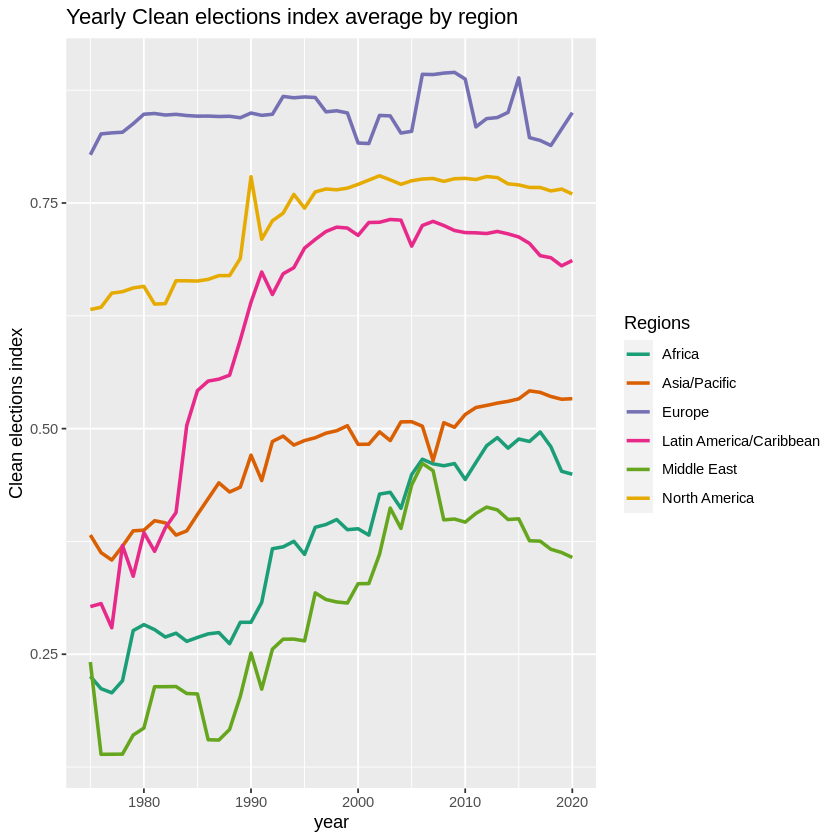

In [21]:
ggplot(yearly_C_SD11, aes(x = yearly_C_SD11$ID_year, y = yearly_C_SD11$'mean(C_SD11)',
                        color = yearly_C_SD11$ID_region)) +
  geom_line(size = 1) +
  scale_color_brewer(palette =  "Dark2") +
  labs(x = 'year', y = 'Clean elections index',
       title = 'Yearly Clean elections index average by region',
       color = 'Regions')


We can see here how Europe and North America far exceed the rest of the regions in clean elections.
The rest of the world found itself in nearly similar positions in 1975 and grew at a steady rate, except for Latin America that had explosive growth in the 80's and went to seperate itself from the other regions by a wide margin.

## Fundamental rights (C_A2)

The Fundamental Rights attribute is defined as "the form of liberal and social rights that support both fair representation and the vertical mechanism of accountability that the first attribute seeks to achieve."

It has subattributes Access to justice (C_SD21), Civil liberties (C_SD22), and Social rights and equality (C_SD23).

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


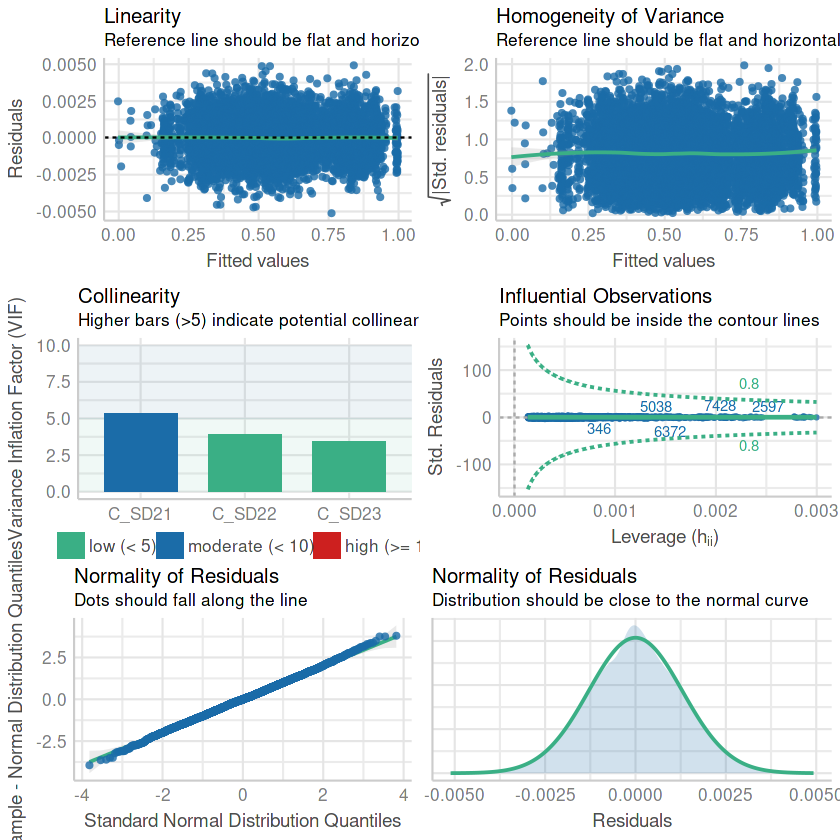

In [ ]:
#I'll write the regression and save it into an object
lm_C_A2 <- lm(C_A2 ~ C_SD21 + C_SD22 + C_SD23, data = gsod)

#And now I run the assumption tests.
check_model(lm_C_A2)

In [ ]:
#All 6 assumption tests pass to the highest degrees (among these are tests of linearity, collinearity, homogeneity of variance and normality of residuals)
#And now onto the linear regression model (ordinary least squares) itself.
summary(lm_C_A2)


Call:
lm(formula = C_A2 ~ C_SD21 + C_SD22 + C_SD23, data = gsod)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0051146 -0.0008565 -0.0000045  0.0008630  0.0049260 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.442e-02  4.961e-05  -290.7   <2e-16 ***
C_SD21       7.119e-01  1.878e-04  3789.9   <2e-16 ***
C_SD22       1.701e-01  1.420e-04  1197.8   <2e-16 ***
C_SD23       1.470e-01  1.432e-04  1026.5   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.001298 on 7457 degrees of freedom
  (30 observations deleted due to missingness)
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 5.208e+07 on 3 and 7457 DF,  p-value: < 2.2e-16


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message:
“Removed 30 rows containing non-finite values (stat_density).”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 30 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 30 rows containing missing values”
Warning message:
“Removed 30 rows containing missing values (geom_point).”
Warning message:
“Removed 30 rows containing missing values (geom_point).”


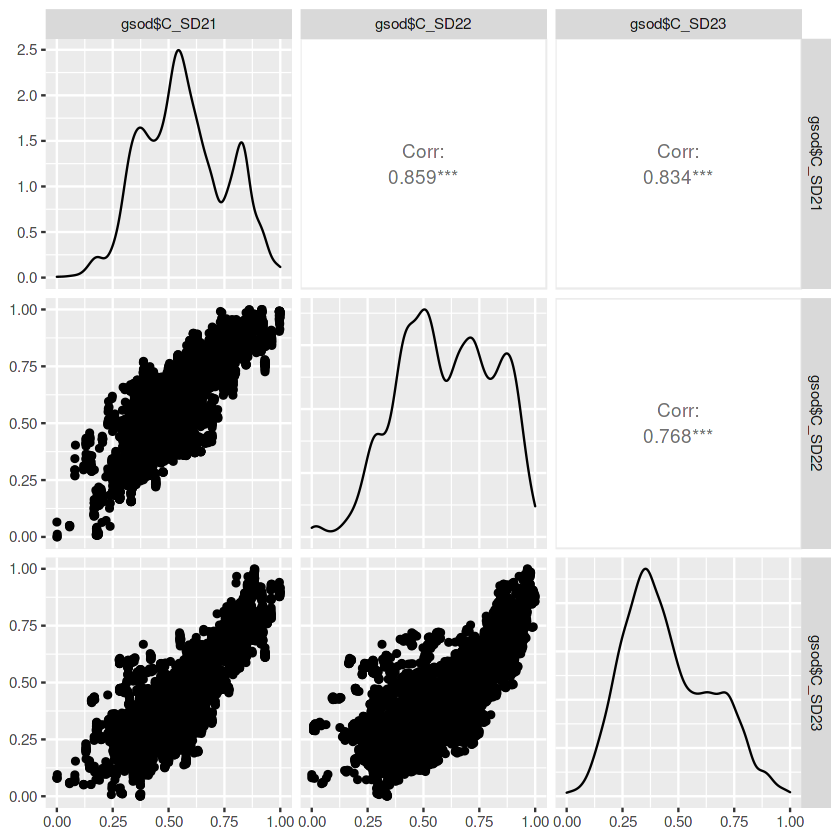

In [ ]:
#First thing that strikes out is how close the residuals are to the model.
#Besides that, by far the most influential coefficient is of C_SD21 (Access to justice).
#R-squared is equal to one and p-values are significant.

#How about we do a correlation map of all subattributes: Access to justice (C_SD21), Civil liberties (C_SD22) and Social rights and equality (C_SD23)

sub_C_A2 <- tibble(gsod$C_SD21, gsod$C_SD22, gsod$C_SD23)

library(GGally)

ggpairs(sub_C_A2)


In [ ]:
#Here we can visualize strong positive correlations between all subattributes, with the most correlation found between Access to justice (C_SD21) and Civil liberties (C_SD22).

## Checks on government (C_A3)

The Checks on government (C_A3) attribute is defined as the attribute that scrutinizes the exercise of politcal power. It adds that "If the other branches of government (the legislature and the judiciary) or a critical and pluralistic press do not check executive power, they are more prone to be abused for private gain and to biased political decision-making and implementation."

It has subattributes Effective parliament (C_SD31), Judicial independence (C_SD32) and Media integrity (C_SD33).


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


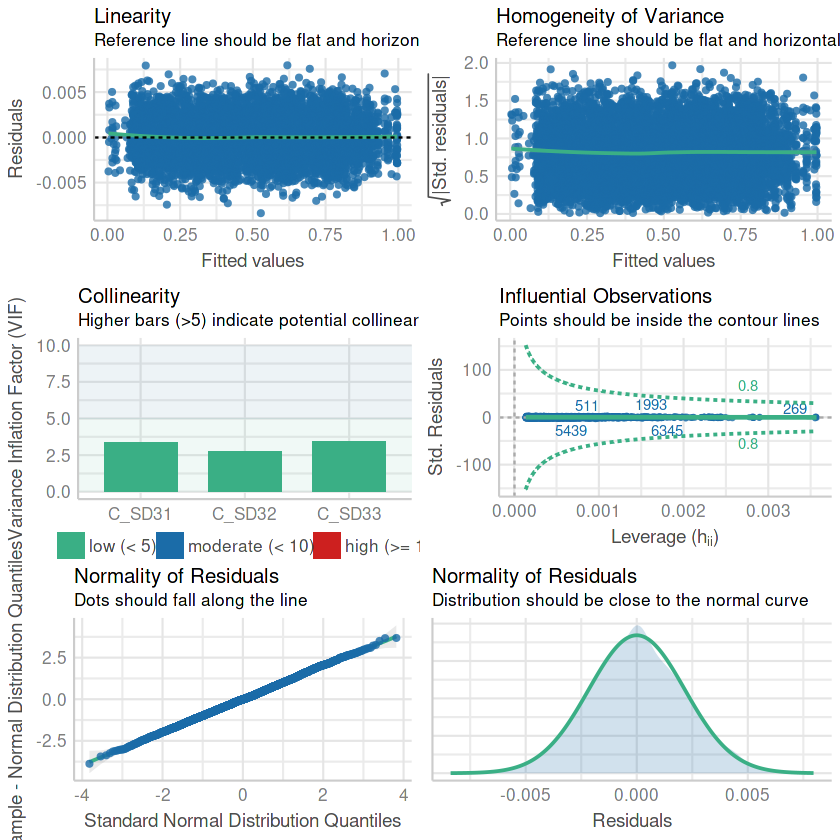

In [ ]:
#I'll write the regression and save it into an object
lm_C_A3 <- lm(C_A3 ~ C_SD31 + C_SD32 + C_SD33, data = gsod)

#And now I run the assumption tests.
check_model(lm_C_A3)


In [ ]:
#All 6 assumption tests pass to the highest degrees (among these are tests of linearity, collinearity, homogeneity of variance and normality of residuals)
#And now onto the linear regression model (ordinary least squares) itself.

summary(lm_C_A3)


Call:
lm(formula = C_A3 ~ C_SD31 + C_SD32 + C_SD33, data = gsod)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0083820 -0.0014434 -0.0000204  0.0014365  0.0079609 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.261e-02  6.695e-05  -337.7   <2e-16 ***
C_SD31       3.663e-01  1.859e-04  1969.7   <2e-16 ***
C_SD32       2.795e-01  2.011e-04  1390.0   <2e-16 ***
C_SD33       3.793e-01  1.811e-04  2094.3   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.002164 on 7470 degrees of freedom
  (17 observations deleted due to missingness)
Multiple R-squared:  0.9999,	Adjusted R-squared:  0.9999 
F-statistic: 2.744e+07 on 3 and 7470 DF,  p-value: < 2.2e-16


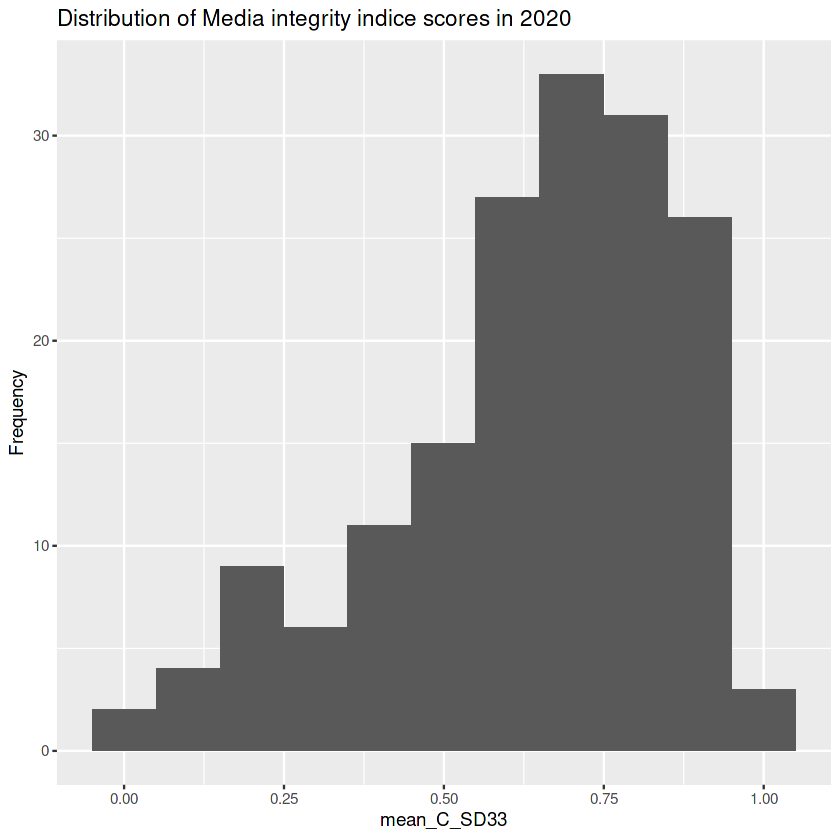

In [ ]:
#The highest coefficient found is that of Media integrity (C_SD33)

#How about we now check the distribution of Media integrity in 2020 (C_SD33).
#First we'll have to create an object containing the Media integrity scores of all countries in 2020

C_SD33_2020 <- gsod %>%
  filter(!is.na(C_SD33), ID_year == 2000) %>%
  group_by(ID_country_name) %>%
  summarise(mean_C_SD33 = mean(C_SD33, na.rm = TRUE))

#Now we can proceed to elaborating a histogram

ggplot(C_SD33_2020, aes(x = mean_C_SD33)) +
  geom_histogram(binwidth = 0.10) +
  labs(x = "mean_C_SD33", y = "Frequency", title = "Distribution of Media integrity indice scores in 2020")


In [ ]:
#Thankfully in 2020 the mode is closer to 1 than to 0 but that still leaves many countries with low scores of Media integrity.

## Impartial administration (C_A4)

The Impartial administration attribute is defined as the impartiality in the implementation of official public policies among the government and public
administration. It adds "Thus, democracy is a matter not only of access to power and control of power, but also of the exercise of power."

It has subattributes Absence of corruption (C_SD41) and Predictable enforcement (C_SD42).


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


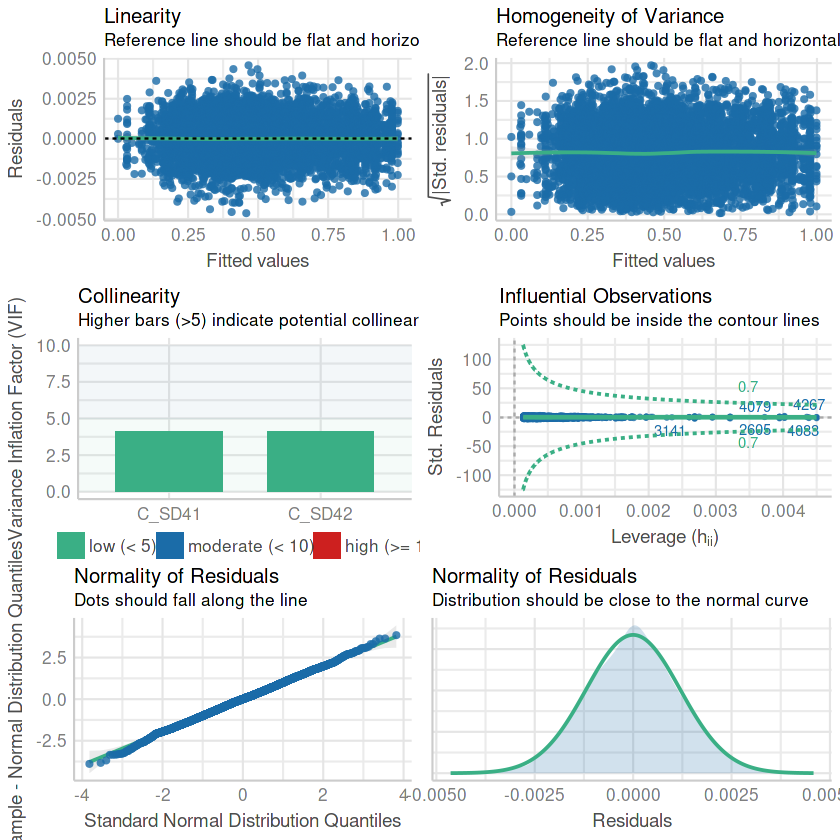

In [ ]:
#I'll write the regression and save it into an object
lm_C_A4 <- lm(C_A4 ~ C_SD41 + C_SD42, data = gsod)

#And now I run the assumption tests.
check_model(lm_C_A4)

In [ ]:
#All 6 assumption tests pass to the highest degrees (among these are tests of linearity, collinearity, homogeneity of variance and normality of residuals)
#And now onto the linear regression model (ordinary least squares) itself.

summary(lm_C_A4)


Call:
lm(formula = C_A4 ~ C_SD41 + C_SD42, data = gsod)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0046375 -0.0008010  0.0000096  0.0007871  0.0045832 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -1.274e-06  3.676e-05   -0.035    0.972    
C_SD41       6.698e-01  1.356e-04 4939.360   <2e-16 ***
C_SD42       3.330e-01  1.376e-04 2420.422   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.001193 on 7488 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 1.059e+08 on 2 and 7488 DF,  p-value: < 2.2e-16


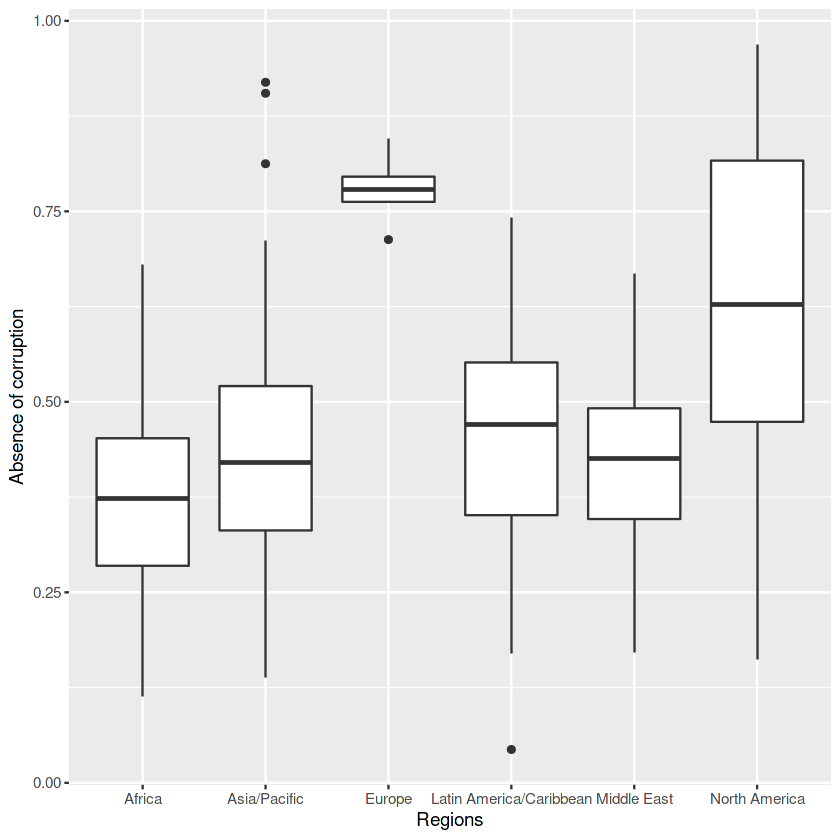

In [ ]:
#The coefficient for Absence of corruption (C_SD41) is twice that of Predictable enforcement (C_SD42)

#How about we see boxplot distributions for both subattributes per subregion in 2020?
#These are the boxplots for Absence of corruption in 2020 per region

#First we start by creating a tibble that will house the necesarry variables
C_SD41 <- tibble(gsod$ID_year, gsod$ID_region, gsod$C_SD41)

#Then we filter out any NAs, filter for 2020 and group by region
C_SD41_2020 <- C_SD41%>%
  filter(!is.na(C_SD41$`gsod$C_SD41`), C_SD41$`gsod$ID_year` == 2020) %>%
  group_by(`gsod$ID_region`)

#Finally we graph our boxplots
ggplot(C_SD41_2020, aes(x = C_SD41_2020$`gsod$ID_region`, y = C_SD41_2020$`gsod$C_SD41`)) +
  geom_boxplot() +
  labs(x= 'Regions', y= 'Absence of corruption')


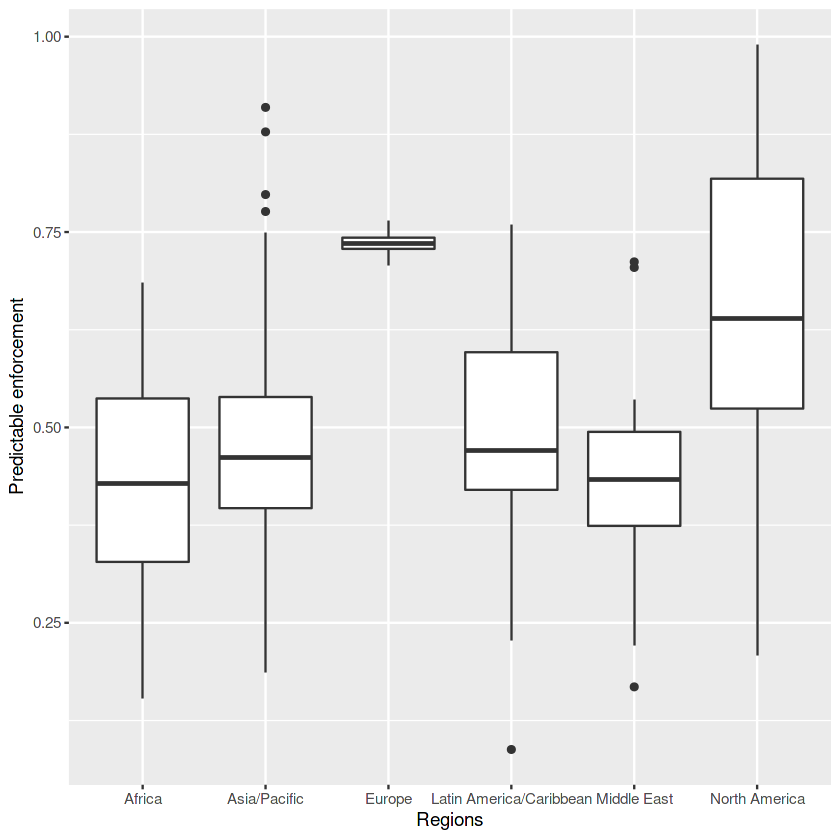

In [ ]:
#The graph shows near identical IQR and ranges for Africa, Asia/Pacific, Latin America / Caribbean and the Middle East,
#save for a few high outliers in the Asia/Pacific region and one near bottom outlier in Latin America / Caribbean.
#Europe shows a very small box concentrated around the 0.75 mark.
#North America the largest range out of all spanning the highest value of all, down to lower extreme similar to the rest of non-European regions.

#These are the boxplots for Predictable enforcement in 2020 per region

#First we start by creating a tibble that will house the necesarry variables
C_SD42 <- tibble(gsod$ID_year, gsod$ID_region, gsod$C_SD42)

#Then we filter out any NAs, filter for 2020 and group by region
C_SD42_2020 <- C_SD42%>%
  filter(!is.na(C_SD42$`gsod$C_SD42`), C_SD42$`gsod$ID_year` == 2020) %>%
  group_by(`gsod$ID_region`)

#Finally we graph our boxplots
ggplot(C_SD42_2020, aes(x = C_SD42_2020$`gsod$ID_region`, y = C_SD42_2020$`gsod$C_SD42`)) +
  geom_boxplot() +
  labs(x= 'Regions', y= 'Predictable enforcement')


In [ ]:
#Nearly identical to the previous set of boxplots save for a couple of more higher end outliers in the Middle East.

## Participatory Engagement

This attribute of democracy doesn't have a unique variable but is instead composed of 4 subattributes: Civil society participation (C_SD51), Electoral participation (C_SD52), Direct Democracy (C_SD53) and Local Democracy (C_SD54).

Given that this attribute doesn't have an indicator that encapsulates it's subattributes and variables I'll instead compare the scores of the individual subattributes for countries in the South America subregion in 2020.


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Warning message:
“Removed 1 rows containing missing values (geom_bar).”


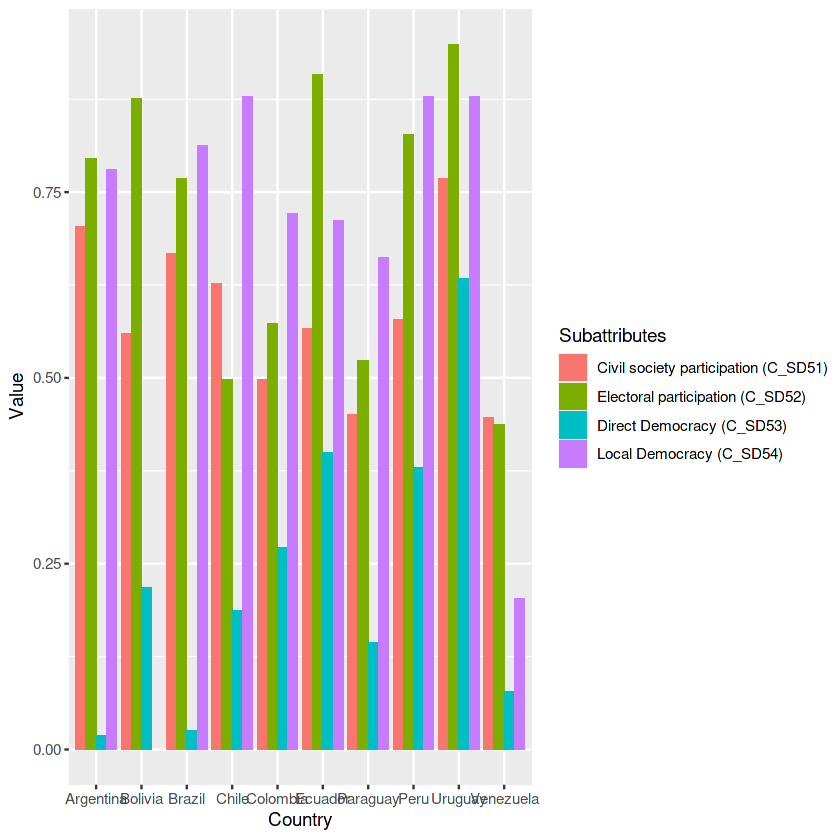

In [ ]:
#First I make a table with the data required

SA_2020 <- gsod %>%
  filter(ID_year == 2020, ID_subregion == 8) %>%
  select(ID_country_name, C_SD51, C_SD52, C_SD53, C_SD54)

#Then I convert this table into long form. This will make it suitable for the grouped bar chart.
library(reshape2)
SA_2020.long <- melt(SA_2020, id.vars = "ID_country_name")

#Now I proceed to graphing
SA_2020.long %>%
  ggplot(aes(x=ID_country_name, y=value, fill=factor(variable)))+
  geom_bar(stat = "identity", position = "dodge")+
  xlab("Country")+ylab("Value")+
  scale_fill_discrete(name="Subattributes",
                      labels=c("Civil society participation (C_SD51)", "Electoral participation (C_SD52)", "Direct Democracy (C_SD53)", "Local Democracy (C_SD54)"))


In [ ]:
#This graph shows us that Uruguay has the highest values for all four subattributes where as Venezuela has the lowest values for all four subattributes

---

# 📊**Share**

As mentioned before by another case study notebook here: ["The share phase is usually done by building a presentation. But for kaggle, the best representation of the analysis and conclusions is it's own notebook".](https://www.kaggle.com/code/brunovr/case-study-2-google-data-analytics-sql-python)

We can then use this section of the case study to go over the conclusions provided by the analysis performed on the data in the Analyze section.
First I'll restate the main question at the root of this study:   
**How can current trends in global democracy guide international and government policy for the development of democracy?**

## Conclusions

- **Representative Government**
    - The Clean Elections subattribute has the highest coefficient of all subattributes in relation to the Representative Government attribute indice.
    - The european region shows the highest and most stable levels of clean elections.
    - There is a small but significant gap between North America and Latin America and the Caribbean.
    - Even though there has been growth in the past decades, the Africa, Asia/Pacific and Middle East regions are lagging far behind the rest of the world.
    - Most growth in the clean elections indice reached it's zenith in the mid 2000s. Since then all regions have either shown decreased rate of growth (Africa, Asia/Pacific and Middle East) or a slight decline (Europe, North America, Latin America and the Caribbean).
    

- **Fundamental Rights**
    - The Access to Justice subattribute is the most influential subattribute in the linear regression model by nearly 7 times the coefficient than the others.
    - The Civil Liberties subattributes has the highest correlation with the Access to Justice subattribute.
    

- **Checks on government**
    - The Media Integrity subattribute has the higher coefficient (3.79) but is closely followed by the Effective parliament subattribute (3.66) and Judicial Independence subattribute (2.80).
    - The mode of the Media integrity distribution is around a mid-high score (0.75) but is very much negative skewed (left skewed).
    - The negative skew of distribution suggest fewer countries with low scores of Media integrity but that those few have more extreme scores.
    

- **Impartial administration**
    - The Abscence of Corruption subattribute has twice the coefficient value (6.67) than the Predictable Enforcement subattribute (3.33).
    - The Europe region has the smallest range and highest median of the Abscence of Corruption. The Asia/Pacific region has the highest range and greatest ammount of positive outliers however it's median is near last place Africa.
    - Excluding outliers, the IQR and medians for Africa, Asia/Pacific, Latin America/Caribbean and Middle East are around 0.50 or lower. The ranges for these regions are nearly the same as well.
    - Nearly the same properities apply for the boxplots of the Predictable Enforcement subattribute.
        

- **Paticipatory Engagement**
    - More information is needed on Local Democracy for Bolivia.
    - Most Local Democracy scores for the South America subregion are high (above 0.75) save for Venezuela (below 0.25)
    - Direct Democracy is low across all of South America (around or below 0.375), the outlier being Uruguay (near 0.625) which makes sense since it is one of the smallest countries in the subregion.
    - Electoral participation is split in two groups: 6 countries with high scores (above 0.75) and 4 countries with low scores (near or below 0.50).
    - Civil Society partcipation has the smallest range of all subattributes (~0.75 to ~0.45) with most countries around a mid-low score (0.625).

## Guiding Questions and Answers

**What story does your data tell?**  
The trends indicate a stagnant and in some cases retraction of democratic values accross all regions of the world. The data also shows a concentration of developed democratic values in regions with a priori known higher per capita economic development: Europe, North America and outliers in the Asia/Pacific region. This is not a perfect correlation though as we can see also see the Middle East region, where some countries are known for having higher GDP per capita but also have some of the lowest values all across the board for the five attributes of democracy. Even within the same subregion we can find disparities like in the case of South America.

In the linear regressions we can see how some subattributes can influence much of the score of an overarching attribute, like in the case of the Fundemental Rights attribute, but this shouldn't be interpreted as a certain subattribute being more important or more influential than the others. Instead these subattributes and their indices should be seen as parts of a wider system of democratic values that go hand in hand. The subattributes with lower coefficients in the linear regressions should not be seen as unimportant or secondary, instead they should be seen as needing just as much if not more attention for the development of healthy democracies around the world since they don't beget or are brought up as easily by the development of other subattributes.  

**How do your findings relate to your original question?**  
The findings of this case study have given us a snapshot of the current state of democracy for various regions accross the world. We can use this information for comparision between countries and regions, as well as for the establishment of objectives and priorities of the differente attributes and subattributes of democracy.

**Were you able to answer the question?**  
Yes.

---

# 💥**Act**

Some recommendations for policymakers at the national and international levels.
- Be watchful of democratic values in stagnation or retreat, even in the most developed democracies.
- Intraregional organizations for the development of democracy could be helpful, as we've seen countries tend to follow their neighbours.
- However it's still possible for positive or negative outliers to exist within regions. These can possibly be a positive or negative influence for their neighbors and should be treated accordingly.
- Values beget values but some more than others. All aspects of democracy are important but priority should also be given to subattributes that aren't as influential on others.
- Europe and North America and some outliers in Asia/Pacific are the highest scoring regions and countries for democratic attributes. These countries also tend to have the highest per capita economic development in the world. Economic development accompanied by healthy distribution of this wealth tend to correlate with higher levels of democracy. Higher GDP per capita with unhealthy distribution can lead to a Middle East type situation where democratic values are among the lowest in the world.

---

# Thank You  

Thank you for reading my first case study. I know the methodology I employed here was for showcasing technical analysis skills more than anything but this subject is also very important to me. I hope to come back and tackle these issues at another instance, with more time, resources and experience under my belt.  

Please provide me your feedback if you're willing. I could really use it.